<a href="https://colab.research.google.com/github/vyshnaviroyal/ABM-Module/blob/main/edubot_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --quiet kaggle seaborn folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import glob
import os


In [4]:
# Upload your kaggle.json file when prompted
from google.colab import files
if not os.path.exists('/content/kaggle.json'):
    print("Please upload your kaggle.json (Kaggle API key).")
    uploaded = files.upload()
    for fn in uploaded:
        os.rename(fn, '/content/kaggle.json')

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Download Uber Pickups dataset
!kaggle datasets download -d fivethirtyeight/uber-pickups-in-new-york-city -p /content -q
!unzip -o /content/uber-pickups-in-new-york-city.zip -d /content/uber_data


Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city
License(s): CC0-1.0
Archive:  /content/uber-pickups-in-new-york-city.zip
  inflating: /content/uber_data/Uber-Jan-Feb-FOIL.csv  
  inflating: /content/uber_data/other-American_B01362.csv  
  inflating: /content/uber_data/other-Carmel_B00256.csv  
  inflating: /content/uber_data/other-Dial7_B00887.csv  
  inflating: /content/uber_data/other-Diplo_B01196.csv  
  inflating: /content/uber_data/other-FHV-services_jan-aug-2015.csv  
  inflating: /content/uber_data/other-Federal_02216.csv  
  inflating: /content/uber_data/other-Firstclass_B01536.csv  
  inflating: /content/uber_data/other-Highclass_B01717.csv  
  inflating: /content/uber_data/other-Lyft_B02510.csv  
  inflating: /content/uber_data/other-Prestige_B01338.csv  
  inflating: /content/uber_data/other-Skyline_B00111.csv  
  inflating: /content/uber_data/uber-raw-data-apr14.csv  
  inflating: /content/uber_data/uber-raw-data-aug14.csv  
  infl

In [2]:
#  Step 3 (Fixed): Load and combine all CSV files safely
import pandas as pd
import glob

# Look for all CSV files in the folder
files = glob.glob('/content/uber_data/*.csv')
print("Found CSV files:", files)

# Load all CSVs and handle different encodings
df_list = []
for f in files:
    try:
        df = pd.read_csv(f, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(f, encoding='latin1')
    df_list.append(df)

# Combine all dataframes
data = pd.concat(df_list, ignore_index=True)

# Convert date column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

# Show data info
print(" Total Rows:", len(data))
print(" Columns:", data.columns.tolist())

# Display first few rows
data.head()


Found CSV files: ['/content/uber_data/other-Federal_02216.csv', '/content/uber_data/other-Prestige_B01338.csv', '/content/uber_data/uber-raw-data-janjune-15.csv', '/content/uber_data/other-Highclass_B01717.csv', '/content/uber_data/other-Diplo_B01196.csv', '/content/uber_data/uber-raw-data-apr14.csv', '/content/uber_data/other-American_B01362.csv', '/content/uber_data/Uber-Jan-Feb-FOIL.csv', '/content/uber_data/uber-raw-data-aug14.csv', '/content/uber_data/other-Carmel_B00256.csv', '/content/uber_data/uber-raw-data-jul14.csv', '/content/uber_data/uber-raw-data-sep14.csv', '/content/uber_data/uber-raw-data-may14.csv', '/content/uber_data/uber-raw-data-jun14.csv', '/content/uber_data/other-Skyline_B00111.csv', '/content/uber_data/other-Dial7_B00887.csv', '/content/uber_data/other-Lyft_B02510.csv', '/content/uber_data/other-FHV-services_jan-aug-2015.csv', '/content/uber_data/other-Firstclass_B01536.csv']
✅ Total Rows: 20508122
✅ Columns: ['Date', 'Time', 'PU_Address', 'DO_Address', 'Routi

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,DATE,TIME,PICK UP ADDRESS,...,Address,Street,time_of_trip,start_lat,start_lng,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 4 (Fixed): Add Time Columns (day, hour, month, weekday)
import pandas as pd
import glob

#  Reload data if it doesn't exist
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

#  Create new time columns
data['day'] = data['Date/Time'].dt.day
data['hour'] = data['Date/Time'].dt.hour
data['month'] = data['Date/Time'].dt.month_name()
data['weekday'] = data['Date/Time'].dt.day_name()

print("Columns:", data.columns.tolist())
data.head()



Columns: ['Date', 'Time', 'PU_Address', 'DO_Address', 'Routing Details', 'PU_Address.1', 'Status', 'DATE', 'TIME', 'PICK UP ADDRESS', 'Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num', 'locationID', 'Date/Time', 'Lat', 'Lon', 'Base', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'dispatching_base_number', 'date', 'active_vehicles', 'trips', 'PU_Adress', 'Base_No', '    Street_Address ', '    City_State ', 'State', 'PuFrom', 'Address', 'Street', 'time_of_trip', 'start_lat', 'start_lng', 'Base Number', 'Base Name', 'Pick Up Date', 'Number of Trips', 'Number of Vehicles', 'hour', 'weekday', 'day', 'month']


,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,DATE,TIME,PICK UP ADDRESS,...,start_lng,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,hour,weekday,day,month
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


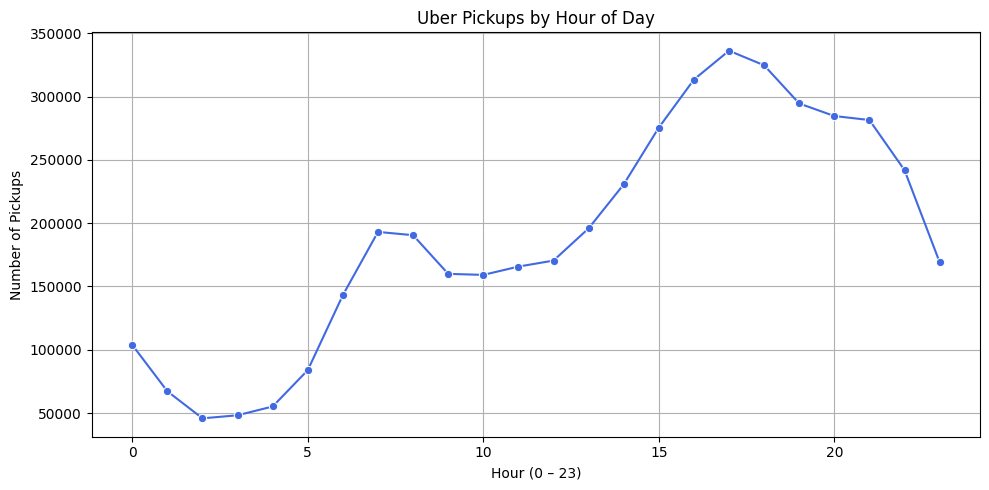

In [5]:
# Step 5: Plot 1 – Hourly pickup trend
hourly = data['hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='royalblue')
plt.title("Uber Pickups by Hour of Day")
plt.xlabel("Hour (0 – 23)")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()


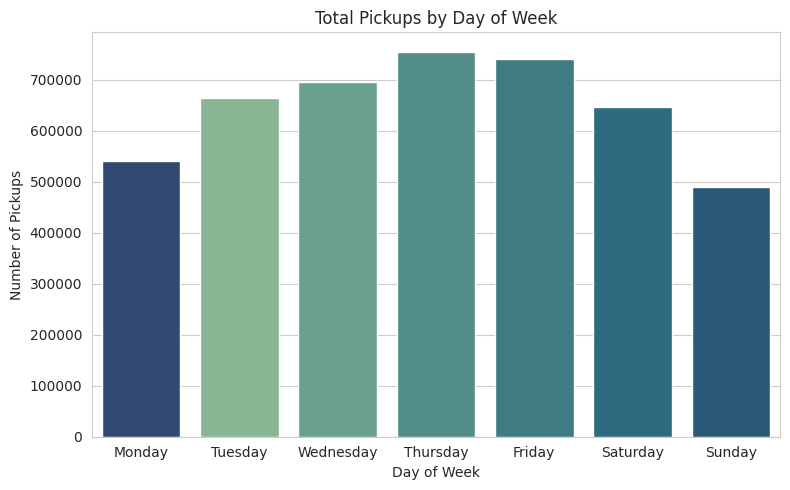

In [1]:
# Step 6 (Final Fixed): Plot – Pickups by Day of Week
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#  Reload dataset if missing
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
    data['weekday'] = data['Date/Time'].dt.day_name()

#  Plot bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(
    x='weekday',
    data=data,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    hue='weekday',       # needed for palette usage in seaborn v0.14+
    palette='crest',
    legend=False
)
plt.title("Total Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()





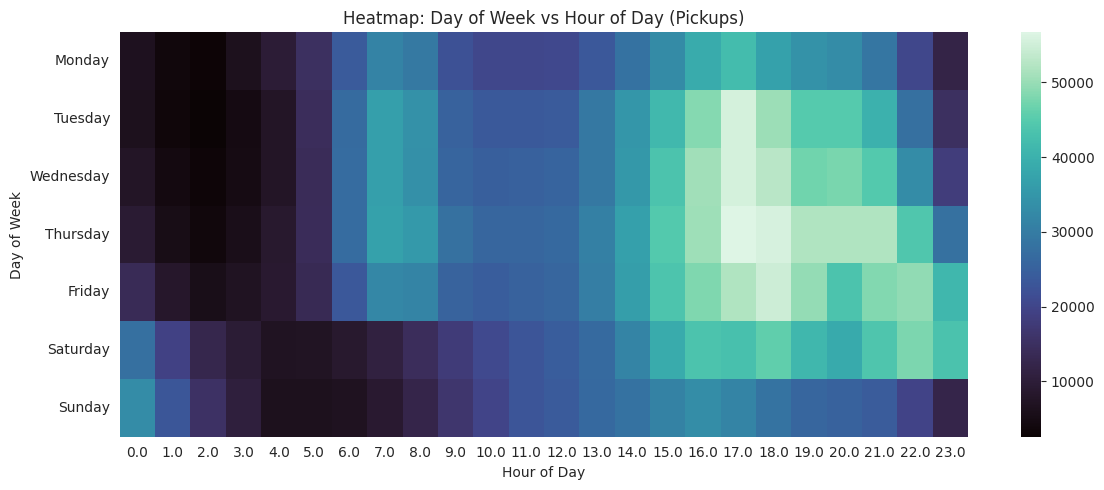

In [2]:
# Ensure needed columns exist
data['hour'] = data['Date/Time'].dt.hour
data['weekday'] = data['Date/Time'].dt.day_name()

pivot = data.pivot_table(
    index='weekday',
    columns='hour',
    values='Date/Time',
    aggfunc='count'
).fillna(0)

pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='mako')
plt.title("Heatmap: Day of Week vs Hour of Day (Pickups)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



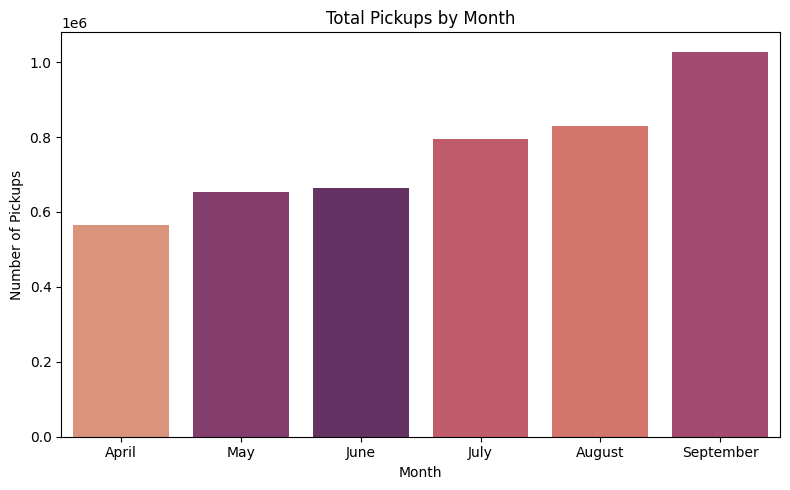

In [1]:
# Step 8 (Final Warning-Free): Total Pickups by Month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)

#  Ensure Date/Time + month columns exist
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
data['month'] = data['Date/Time'].dt.month_name()

#  Plot Monthly Pickups (new Seaborn syntax)
plt.figure(figsize=(8,5))
sns.countplot(
    x='month',
    data=data,
    order=['April','May','June','July','August','September'],
    hue='month',        # 👈 required for using palette
    palette='flare',
    legend=False        # 👈 hide legend to match old look
)
plt.title("Total Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()



In [4]:
# Step 9 (Final Fixed): Map of pickup locations (sample)
import pandas as pd
import folium
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)

#  Ensure proper coordinate column names
if 'Lat' not in data.columns or 'Lon' not in data.columns:
    data.rename(columns={'lat': 'Lat', 'lon': 'Lon', 'Lat.': 'Lat', 'Lon.': 'Lon'}, inplace=True)

#  Drop rows with missing coordinates
data = data.dropna(subset=['Lat', 'Lon'])

#  Take a sample for mapping
sample = data.sample(5000, random_state=42)

#  Create folium map
m = folium.Map(location=[sample['Lat'].mean(), sample['Lon'].mean()], zoom_start=11)

#  Add circle markers (NaN-safe)
for _, r in sample.iterrows():
    try:
        folium.CircleMarker(
            location=[r['Lat'], r['Lon']],
            radius=1,
            color='blue',
            opacity=0.4
        ).add_to(m)
    except ValueError:
        continue  # skip rows with invalid coords

#  Save and display
m.save('/content/uber_pickup_map.html')
m



/tmp/ipython-input-586160441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busy_days.index.astype(str), y=busy_days.values, palette='rocket')


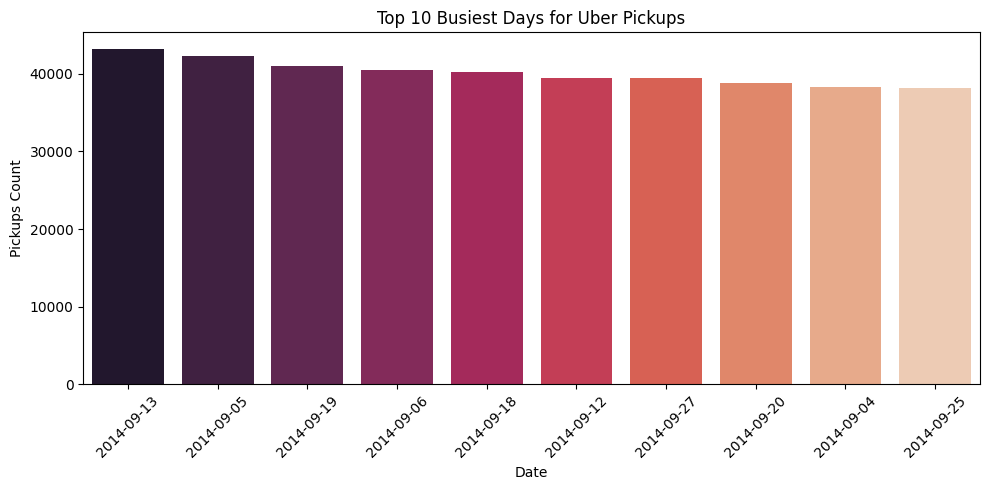

In [5]:
# Step 10: Plot 6 – Busiest days (top 10)
busy_days = data['Date/Time'].dt.date.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=busy_days.index.astype(str), y=busy_days.values, palette='rocket')
plt.title("Top 10 Busiest Days for Uber Pickups")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Pickups Count")
plt.tight_layout()
plt.show()


In [7]:
# Step 11 (Fixed): Summary table showing patterns
import pandas as pd
import glob

#  Reload dataset if 'data' not defined
if 'data' not in locals():
    files = glob.glob('/content/uber_data/*.csv')
    df_list = []
    for f in files:
        try:
            df = pd.read_csv(f, encoding='utf-8')
        except UnicodeDecodeError:
            df = pd.read_csv(f, encoding='latin1')
        df_list.append(df)
    data = pd.concat(df_list, ignore_index=True)
    data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

#  Ensure time columns exist
if 'hour' not in data.columns:
    data['hour'] = data['Date/Time'].dt.hour
if 'weekday' not in data.columns:
    data['weekday'] = data['Date/Time'].dt.day_name()
if 'month' not in data.columns:
    data['month'] = data['Date/Time'].dt.month_name()

#  Recompute hourly data
hourly = data['hour'].value_counts().sort_index()

#  Summary table
summary = pd.DataFrame({
    'Most Active Hour': [hourly.idxmax()],
    'Least Active Hour': [hourly.idxmin()],
    'Busiest Day': [data['weekday'].value_counts().idxmax()],
    'Least Busy Day': [data['weekday'].value_counts().idxmin()],
    'Busiest Month': [data['month'].value_counts().idxmax()]
})

print(" Summary of Transportation Insights:")
display(summary)



✅ Summary of Transportation Insights:


,Most Active Hour,Least Active Hour,Busiest Day,Least Busy Day,Busiest Month
0,17,2,Thursday,Sunday,September
